### sklearn.tree.DecisionTreeClassifier
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=treeclassifier#sklearn.tree.DecisionTreeClassifier

max_depth : int, default=None \
min_samples_split : int or float, default=2 \
min_samples_leaf : int or float, default=1 \
min_weight_fraction_leaf : float, default=0.0 \
max_features : int, float or {“auto”, “sqrt”, “log2”}, default=None

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree에 옵션을 추가 : 하이퍼 파라미터 조정 ㅇㅇ
dt_clf = DecisionTreeClassifier(random_state= 156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [29]:
pred = dt_clf.predict(X_test)

In [30]:
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score

print(f'정확도는 : {accuracy_score(y_test, pred)}')

정확도는 : 0.9333333333333333


In [32]:
dt_clf.feature_importances_
# decisiontree 학습한 결과 중 feature_importances_를 찍어본 것
# decisiontree가 그래프에서 bar 차트로 봤을 때 
# feature의 중요도를 petal length, petal width로 봤다는 의미
# feature를 골라야 하는데 어떤 게 중요한지 모르겠을 때 
# 꽃잘알이 아니어서 feature selection을 못하겠을 때 
# decision tree 일단 돌려서 feature_importance를 돌려서
# 높게 나온 것들을 사용하겠다~ 하는 것

# decision tree에서 중요도가 크다는 건, information gain 정도가 높기 때문
# 왜 이 feature를 선택했는가?에 질문이 있을 때 
# decision tree에서 feature_importance를 해서 상위 2개를 선택했다~ 라고 답하면 좋음

# feature selection할 때는 decision tree나 random forest 사용하면 된다~
# 라고 알고 있으면 된다

# feature를 선택하는 방법을 모르면 decision tree나 random forest 학습시켜서
# 상위 몇 개 골라보자
# 그래서 돌려보면서 갯수를 바꿔볼까? 다른 학습을 해볼까? 이런 식으로 진행

array([0.02500521, 0.        , 0.55490281, 0.42009198])

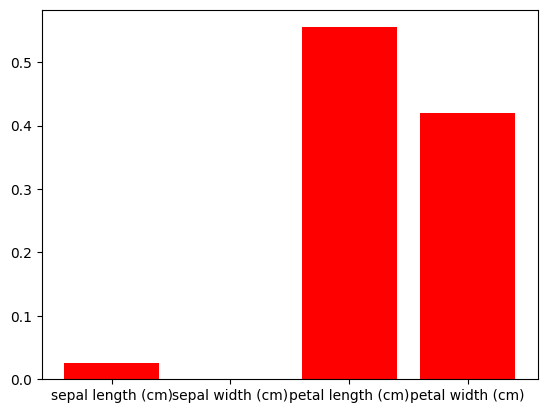

In [33]:
import matplotlib.pyplot as plt
plt.bar(iris_data.feature_names, dt_clf.feature_importances_, color='red')
plt.show()

### sklearn.tree.export_graphviz
* sklearn.tree.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')
> https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html?highlight=graphviz#sklearn.tree.export_graphviz

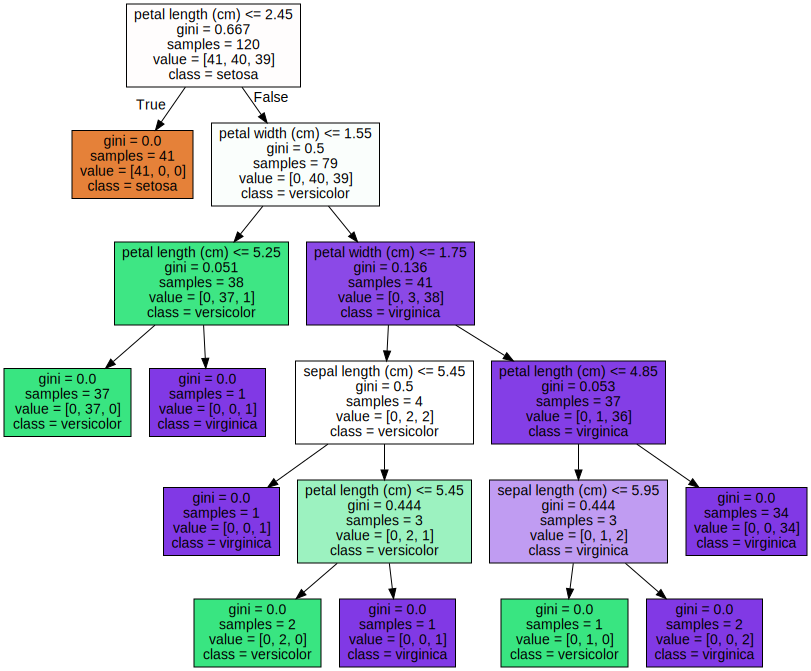

In [34]:
from sklearn.tree import export_graphviz
# 내보내는 라이브러리

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
# 인자값으로 (학습한 데이터, 어떻게 저장할지, 라벨네임, 피쳐네임, ,,,)
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
    feature_names=iris_data.feature_names, impurity = True, filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook 상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

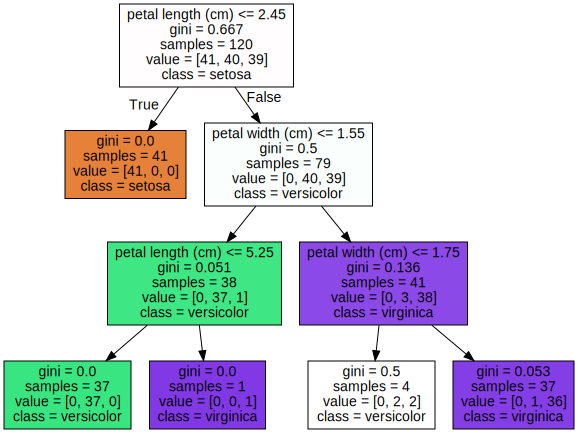

In [35]:
# max_depth = 3으로 변경
dt_clf = DecisionTreeClassifier(random_state= 156, max_depth=3)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
    feature_names=iris_data.feature_names, impurity = True, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

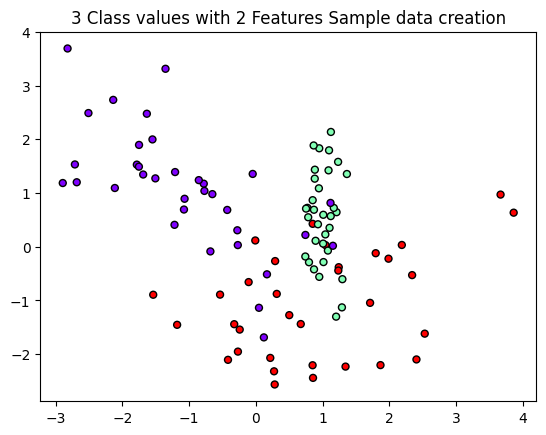

In [36]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# make_classification
# 지가 알아서 가짜 데이터를 만들어 주는 라이브러리

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classfication 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')


In [37]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

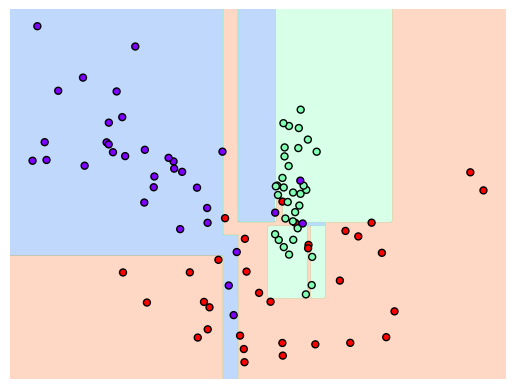

In [38]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

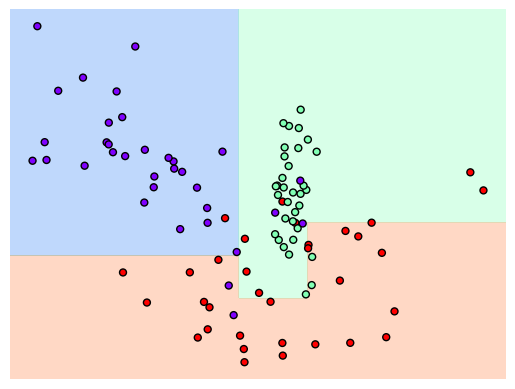

In [39]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

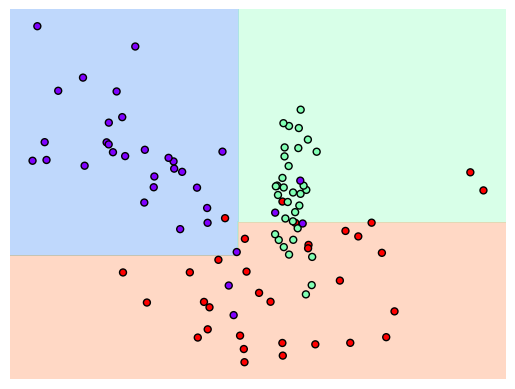

In [40]:
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### sklearn.ensemble.VotingClassifier
* class sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html?highlight=votingclassifier#sklearn.ensemble.VotingClassifier

### sklearn.linear_model.LogisticRegression
* class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression

### sklearn.neighbors.KNeighborsClassifier
* class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneigh#sklearn.neighbors.KNeighborsClassifier

### sklearn.datasets.load_breast_cancer
* sklearn.datasets.load_breast_cancer(*, return_X_y=False, as_frame=False)
> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=load_breast#sklearn.datasets.load_breast_cancer

### skleran.ensemble.RandomForestClassifier
* class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier

In [77]:
# Load_breast_cancer() 위스콘신 유방암 데이터 세트 
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [59]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=10)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(random_state=120)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
# vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf), ('DC', dt_clf), ('RF', rf_clf)], voting='soft')
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [vo_clf, dt_clf, lr_clf, knn_clf, rf_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    #print(f'{class_name} 정확도 : {accuracy_score(y_test, pred)}')

Voting 분류기 정확도 : 0.9474
VotingClassifier 정확도 : 0.9474
DecisionTreeClassifier 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9474
RandomForestClassifier 정확도 : 0.9561


In [79]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(random_state=156)
knn_clf = KNeighborsClassifier(n_neighbors=10)
dt_clf = DecisionTreeClassifier(min_samples_split=5)
rf_clf = RandomForestClassifier(random_state=120)

parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5, refit=True) 

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
# vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf), ('DC', dt_clf), ('RF', rf_clf)], voting='soft')
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf), ('GS', grid_dtree)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
# vo_clf.fit(X_train, y_train)
# pred = vo_clf.predict(X_test)
# print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [vo_clf, dt_clf, lr_clf, knn_clf, rf_clf, grid_dtree]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    #print(f'{class_name} 정확도 : {accuracy_score(y_test, pred)}')

VotingClassifier 정확도 : 0.9386
DecisionTreeClassifier 정확도 : 0.9386
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9474
RandomForestClassifier 정확도 : 0.9561
GridSearchCV 정확도 : 0.9298


### 여기까지가 수업내용
이하부터는 Human_activity 데이터 관련

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피쳐명이 공백으로 분리되어 있음
# 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./Human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피쳐명 index를 제거하고 피쳐명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피쳐명에서 10개만 추출 : ', feature_name[:10])

전체 피쳐명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [63]:
feature_name_df.head(10)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [64]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()
# 이게 왜 중복된 피쳐명 확인인지 모르겠네

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [65]:
# 중복되는 feature 명에 대해서 원본 feature 명에 _1 또는 _2를 추가로 부여하는 함수인 get_new_feature_name_df()를 생성
# (원본 데이터에 중복된 feature 명으로 인해 신규 버전의 pandas에서 duplicate name에러가 발생했기 때문)
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [68]:
import pandas as pd

def get_human_dataset():
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./Human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./Human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./Human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩, 컬럼명은 action으로 부여
    y_train = pd.read_csv('./Human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./Human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [69]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [70]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [72]:
X_train.isna().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [73]:
X_train.isna().sum().sum()

0

In [75]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도 : {accuracy}')

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8547675602307431
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [76]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_}')
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513444970102249
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


In [ ]:
# 아 하기 귀찮아 192슬라이드 치다 맒

여기까지 수업 내용 \
아래는 내가 이거저거 추가해본 코드

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬 : ')
    print(confusion)
    #print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
    print(f'정확도: {accuracy:^.4f}, 정밀도: {precision:^.4f}, 재현율: {recall:^.4f}, F1: {f1:^.4f}')

In [45]:
# DecisionTree 이용한 지도학습 진행
# 나무 결정해 다른 데이터 (feature) 들어오면 해당 데이터에 대해 class 분류 
# 나무를 결정 = 학습을 시킨다. (데이터 째려보고, 전처리하고, 대입해서 학습시키고, 평가 및 예측)
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# warnings 는 주피터 노트북에서 빨갛게 경고 안뜨게 하는 것, 있어도 그만 없어도 그만

# 데이터 째려보는 데서 교차검증도 가능, 상관관계 볼 수도 있음, 박스플랏도 그려볼 수 있음,,,
# 단, 현재 단계에서는 알고리즘 자체에 집중하기 위해 평가 안하고,
# 교차검증 등의 다른 분석을 돌리지 않는 것

# DecisionTree Classifier 생성
# 나무 한 번 선언해서 random_state 잡아줌
# random_state는 한 번 결정되면 계속 사용하기 위한 것, 일종의 cd 역할
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
# 위의 random_state는 별개 이기 때문에 달라고 상관없음

cross_val_score(dt_clf, X_train, y_train, cv=10)

array([0.83333333, 1.        , 0.83333333, 1.        , 1.        ,
       1.        , 1.        , 0.91666667, 1.        , 1.        ])

In [46]:
# DecisionTreeClassfier 학습
dt_clf.fit(X_train, y_train) # 왜 2개? 지도학습이니까 2개 들어감
pred_proba = dt_clf.predict_proba(X_test)
pred = dt_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (30, 3)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0. 0. 1. 2.]
 [0. 0. 1. 2.]
 [0. 1. 0. 1.]]


In [47]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 변환값의 두 번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

#get_clf_eval(y_test, custom_predict)

In [48]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = dt_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape : ', thresholds.shape)
print('반환된 precisions 배열의 Shape : ', precisions.shape)
print('반환된 recalls 배열의 Shape : ', recalls.shape)

print('thresholds 5 sample : ', thresholds[:5])
print('precisions 5 sample : ', precisions[:5])
print('recalls 5 sample : ', recalls[:5])

ValueError: multiclass format is not supported

In [ ]:
# 어떻게 DecisionTree가 나왔는지 그래프도 보고
# predict도 찍어보고
# accuracy score도 찍어보고

from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)